In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
#sqlite -- dialect ex. pyscopg2, mysql
#db name - hawai.sqlite
# user @ password
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model

# automap will scan the db and get the details of the tables within it

Base = automap_base() # createing an object of automap_base

# reflect the tables
Base.prepare(engine, reflect = True) #scanning the database and getting the info

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
M = Base.classes.measurement
S = Base.classes.station

In [9]:
print(M)
S

<class 'sqlalchemy.ext.automap.measurement'>


sqlalchemy.ext.automap.station

In [10]:
#inpsect the columns in table measurement
list(sqlalchemy.inspect(M).columns)

[Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<measurement>),
 Column('date', TEXT(), table=<measurement>),
 Column('prcp', FLOAT(), table=<measurement>),
 Column('tobs', FLOAT(), table=<measurement>)]

In [11]:
#inpsect the columns in table Station
list(sqlalchemy.inspect(S).columns)

[Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<station>),
 Column('name', TEXT(), table=<station>),
 Column('latitude', FLOAT(), table=<station>),
 Column('longitude', FLOAT(), table=<station>),
 Column('elevation', FLOAT(), table=<station>)]

In [12]:
# Create our session (link) from Python to the DB
session = Session(bind = engine) # opening a query session where we can extract or updte data into the DB

# Exploratory Climate Analysis

In [13]:
measures = session.query(M.id, M.station, M.tobs, M.date, M.prcp).all() #==> Select * from measurement in mysql
pd.DataFrame(measures)

,id,station,tobs,date,prcp
0,1,USC00519397,65.0,2010-01-01,0.08
1,2,USC00519397,63.0,2010-01-02,0.00
2,3,USC00519397,74.0,2010-01-03,0.00
3,4,USC00519397,76.0,2010-01-04,0.00
4,5,USC00519397,73.0,2010-01-06,NaN
...,...,...,...,...,...
19545,19546,USC00516128,71.0,2017-08-19,0.09
19546,19547,USC00516128,78.0,2017-08-20,NaN
19547,19548,USC00516128,76.0,2017-08-21,0.56
19548,19549,USC00516128,76.0,2017-08-22,0.50


In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
lastDate = dt.datetime.strptime("2017-08-23","%Y-%m-%d")
lastDate
oneYrAgo = lastDate - dt.timedelta(days=365)
oneYrAgo

datetime.datetime(2016, 8, 23, 0, 0)

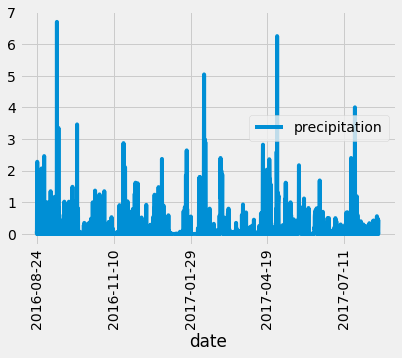

In [15]:
# Perform a query to retrieve the data and precipitation scores
# equivalent SQL = Select date, prcp from measurement where data >= "2016-08-23"
prcp = session.query(M.date, M.prcp).filter(M.date >= oneYrAgo).all() 

# Save the query results as a Pandas DataFrame and set the index to the date column
pDf = pd.DataFrame(prcp, columns = ["date", 'precipitation'])

# Sort the dataframe by date
pDf = pDf.sort_values("date")
pDf.fillna(0, inplace=True)
pDf.set_index("date", inplace=True)
# Use Pandas Plotting with Matplotlib to plot the data
pDf.plot(rot = 90)

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
pDf.describe()

,precipitation
count,2223.000000
mean,0.159951
std,0.441220
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


In [17]:
# Design a query to show how many stations are available in this dataset?
#equivalent sql = Select count(name) from station
session.query(func.count(S.name)).all()

[(9)]

In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.fall 
# equivalent = Select station, count(id) from measurement group by station order by count(id) desc

session.query(M.station, func.count(M.id)).group_by(M.station).order_by(func.count(M.id).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(func.min(M.tobs),func.avg(M.tobs),func.max(M.tobs)).filter(M.station == "USC00519281").all()

[(54.0, 71.66378066378067, 85.0)]

In [20]:
import datetime as dt

In [21]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
lastYearData = session.query(M.tobs).filter(M.station == "USC00519281").filter(M.date >= dt.date(2016,8,23)).all()
lastYearData

[(77.0),
 (77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 

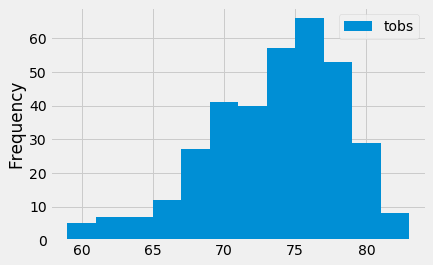

In [22]:
pltDf = pd.DataFrame(lastYearData)
pltDf.plot.hist(bins = 12)

## Bonus Challenge Assignment

In [23]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

NameError: name 'Measurement' is not defined

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
